<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/credit_risk_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
data=pd.read_csv('/content/dataset.csv')
data.head()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   id                                                        1000 non-null   int64 
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose of the credit                                     1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Status of savings account/bonds                           1000 non-null   object
 6   Present employment(years)                                 1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   personal_status              

In [4]:
oe=OneHotEncoder(sparse=False)
le=LabelEncoder()
oe_data=oe.fit_transform(data[['Housing']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


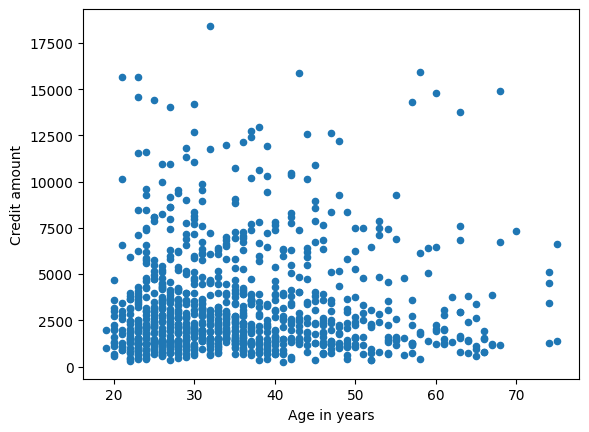

In [5]:
data.plot(kind='scatter',x='Age in years',y='Credit amount');

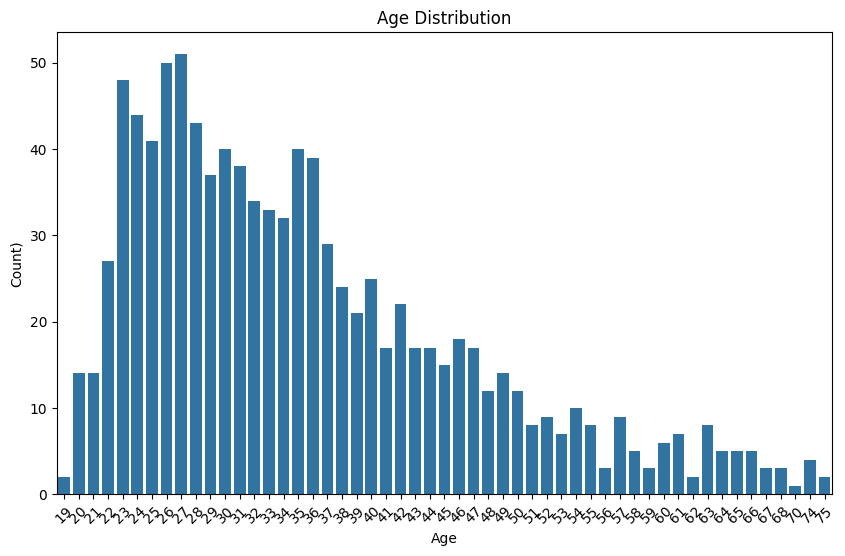

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age in years', data=data)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count)')
plt.xticks(rotation=45)
plt.show()

In [6]:
y=data['Credit amount']
x=data['Age in years'],['Housing']

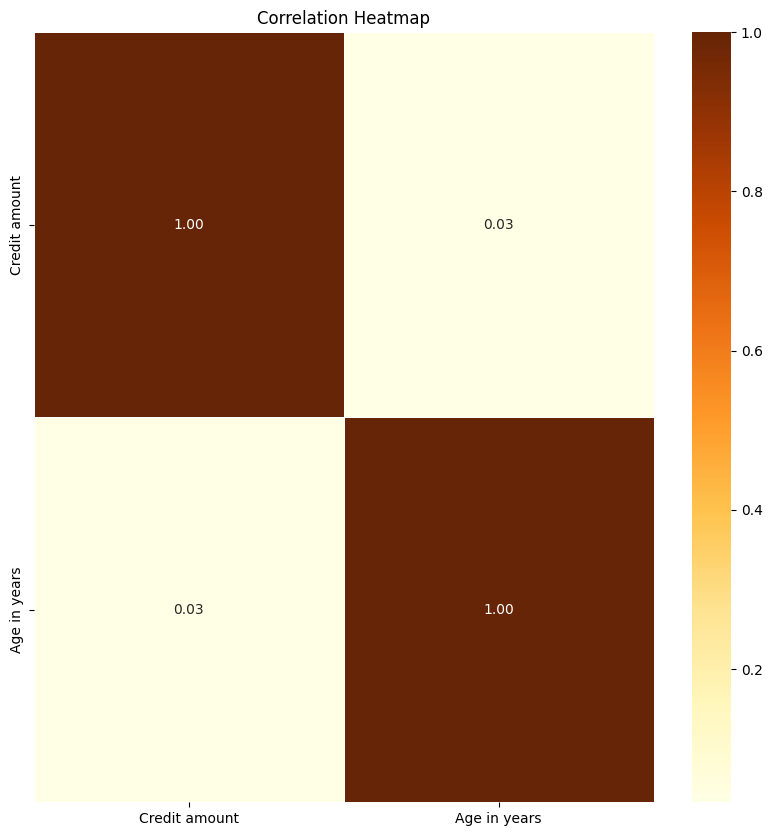

In [22]:
corr=data[['Credit amount','Age in years']].corr()
# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [23]:
y=data['Credit amount']
x=data[['Present employment(years)']]

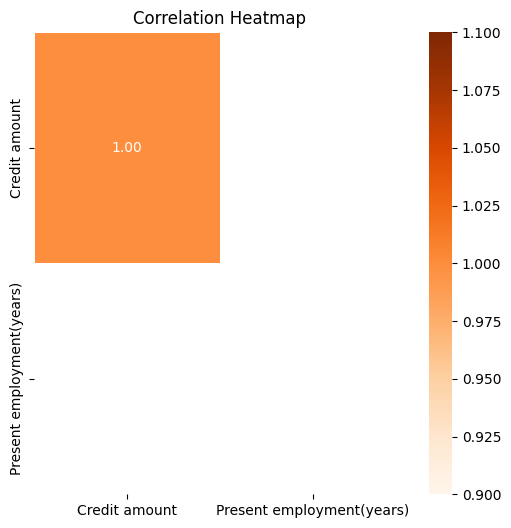

In [30]:
data['Present employment(years)'] = pd.to_numeric(data['Present employment(years)'], errors='coerce')
corr=data[['Credit amount','Present employment(years)']].corr()
# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
input_col = ['Durations',
 'Credit history',
 'Credit_Purpose',
 'Credit amount',
 'Installment_Rate_Percent',
 'Other debtors / guarantors',
 'Residence_Years',
 'Property',
 'Age in years',
 'Other_Inst_Plans',
 'Housing',
 'Num_Existing_Credits',
 'Job',
 'Liable_People',
 'Telephone',
 'Foreign worker',
 'Gender',
 'Status',
 'Years_Employments',
 'Saving_Status']
target_col = 'Checking_Account_Status'
target_col_XGB = 'Status_binary'

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_train.head()

,Present employment(years)
29,>=7
535,<1
695,1<=X<4
557,1<=X<4
836,1<=X<4


In [35]:
y_train.head()

29     6836
535    2319
695    1236
557    5003
836     886
Name: Credit amount, dtype: int64

In [37]:
numerical_columns= ['Durations',
 'Credit amount',
 'Installment_Rate_Percent',
 'Residence_Years',
 'Age in years',
 'Num_Existing_Credits',
 'Years_Employments']

In [45]:
x=data['Age in years']
y=data['Credit amount']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) ##for age in years

In [50]:
# Reshape x_train to be a 2D array before fitting the model
x_train = x_train.values.reshape(-1, 1)

rfclassifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
rfclassifier.score(x_train, y_train)

0.07

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(random_state=42)
dtclassifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
dtclassifier.score(x_train, y_train)

0.07

In [61]:
xgb= RandomForestClassifier(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
xgb.score(x_train, y_train)

0.07